In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy.io import loadmat, savemat

In [2]:
# Read the Excel file
file_name = 'Data_4_Import_REST.xlsx'  # Replace with your file path
excel_sheet_name = 'Depression Rest'
file_path = os.path.join("Depression_Study", "depression_data", file_name)
df_raw = pd.read_excel(file_path, sheet_name=excel_sheet_name)

# Extract values from the first column into two arrays
healthy_sample = df_raw[df_raw.iloc[:, 1] == 99].iloc[:, 0].tolist()
depressed_sample = df_raw[df_raw.iloc[:, 1] != 99].iloc[:, 0].tolist()

# Print the results
print("Healthy sample:", healthy_sample)
print("Depressed sample:", depressed_sample)
print()
print(df_raw)

Healthy sample: [507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 560, 562, 563, 564, 566, 568, 569, 570, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 588, 589, 590, 593, 596, 599, 600, 601, 603, 609, 611, 612, 615, 617, 619, 620, 621, 623]
Depressed sample: [558, 559, 561, 565, 567, 571, 572, 586, 587, 591, 592, 594, 595, 597, 598, 602, 604, 605, 606, 607, 608, 610, 613, 614, 616, 618, 622, 624, 625, 626, 627, 628]

      id  MDD                         MDD_note  HamD  sex   age   BDI  \
0    507   99                              NaN   NaN  1.0  19.0   0.0   
1    508   99                              NaN   NaN  1.0  18.0   4.0   
2    509   99                              NaN   NaN  1.0  18.0   7.0   
3    510   99                              NaN   NaN  1.0  19

In [ ]:
# Load CSER values from MAT file
cser_values = loadmat("cser_values.mat")

# Extract field names from cser_open and cser_closed
field_names_open = [int(name[1:]) for name in cser_values['cser_open'].dtype.names]
field_names_closed = [int(name[1:]) for name in cser_values['cser_closed'].dtype.names]

# Extract values from the CSER data
cser_open = np.array([value[0][0] for sublist in cser_values['cser_open'][0] for value in sublist])
cser_closed = np.array([value[0][0] for sublist in cser_values['cser_closed'][0] for value in sublist])

# Extract band values into separate list for each band
cser_band_open = [np.array([value[0][i] for sublist in cser_values['cser_band_open'][0] for value in sublist]) for i in range(6)]
cser_band_closed = [np.array([value[0][i] for sublist in cser_values['cser_band_closed'][0] for value in sublist]) for i in range(6)]

# Extract CSER from the for each of the 60 sources
cser_source_open = [np.array([value[0][i] for sublist in cser_values['cser_source_open'][0] for value in sublist]) for i in range(60)]
cser_source_closed = [np.array([value[0][i] for sublist in cser_values['cser_source_closed'][0] for value in sublist]) for i in range(60)]

# Extract CSER from the for each of the 60 sources
cser_source_band_open = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_open'][0] for value in sublist]) for i in range(60)] for j in range(6)])
cser_source_band_closed = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_closed'][0] for value in sublist]) for i in range(60)] for j in range(6)])
# i source x j band

# Extract AAL source names
source_names = [(cser_values['source_names'][i][0][0]) for i in range(60)]
# print("Source names:", source_names)

Source names: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Postcentral_L', 'Postcentral_R', 'Parietal_Sup_L', 'Parietal_Sup_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'SupraMarginal_L', 'SupraMarginal_R', 'Angular_L', 'Angular_R', 'Precuneus_L', 'Precuneus_R', 'Paracentral_Lobule_L', 'Paracentral_Lobule_R', 'Temporal_Sup_L', 'Temporal_Sup_R', 'Temporal_Pole_Sup_L', 'T

In [4]:
# print(df_raw.columns.tolist())
df = df_raw.copy()
df = df.drop(columns=['MDD_note', 'HamD'])
# print(df.columns.tolist())

missing_ids_open = set(df['id']) - set(field_names_open)
df = df[~df['id'].isin(missing_ids_open)]

df['eyes'] = 'open'
df['area'] = 'brain'
df['band'] = 'broadband'
df['CSER'] = np.nan

df['depressed'] = df.iloc[:, 1].apply(lambda x: 1 if x != 99 else 0)

# Reorder columns: insert ['eyes', 'area', 'band', 'CSER'] after 'id'
cols = df.columns.tolist()
insert_cols = ['eyes', 'area', 'band', 'CSER']
# Remove if already present to avoid duplication
for c in insert_cols:
    if c in cols:
        cols.remove(c)
id_idx = cols.index('id')
new_cols = cols[:id_idx+1] + insert_cols + cols[id_idx+1:]
df = df[new_cols]

print(df.columns.tolist())
print()

df_copy = df.copy()

print("DF Shape:", df.shape)

# OPEN / BRAIN / BROADBAND
for i, row in df.iterrows():
    id_value = row['id']
    if id_value in field_names_open:
        df.at[i, 'CSER'] = cser_open[field_names_open.index(id_value)]

print("DF Shape after inserting [open / brain / broadband]:", df.shape)

# CLOSED / BRAIN / BROADBAND
df_closed = df_copy.copy()
df_closed['eyes'] = 'closed'
df_closed['area'] = 'brain'
df_closed['band'] = 'broadband'
# Add CSER values for closed eyes
for i, row in df_closed.iterrows():
    id_value = row['id']
    if id_value in field_names_closed:
        df_closed.at[i, 'CSER'] = cser_closed[field_names_closed.index(id_value)]
df = pd.concat([df, df_closed], ignore_index=True)

print("DF Shape after inserting [closed / brain / broadband]:", df.shape)

# open / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12
# band_names = ["1-4","4-8","8-12","12-30","30-100"]
band_names = ["1-4","4-8","8-12","12-30","30-100","1-12"]
for i, band in enumerate(band_names):
    df_band = df_copy.copy()
    df_band['eyes'] = 'open'
    df_band['area'] = 'brain'
    df_band['band'] = band
    for j, row in df_band.iterrows():
        id_value = row['id']
        if id_value in field_names_open:
            data_index = field_names_open.index(id_value)
            df_band.at[j, 'CSER'] = cser_band_open[i][data_index]
    df = pd.concat([df, df_band], ignore_index=True)

print("DF Shape after inserting [open / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]:", df.shape)

# closed / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12
for i, band in enumerate(band_names):
    df_band = df_copy.copy()
    df_band['eyes'] = 'closed'
    df_band['area'] = 'brain'
    df_band['band'] = band
    for j, row in df_band.iterrows():
        id_value = row['id']
        if id_value in field_names_closed:
            data_index = field_names_closed.index(id_value)
            df_band.at[j, 'CSER'] = cser_band_closed[i][data_index]
    df = pd.concat([df, df_band], ignore_index=True)

print("DF Shape after inserting [closed / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]:", df.shape)

# open / src01, src02, ..., src60 / broadband
for i in range(60):
    df_source = df_copy.copy()
    df_source['eyes'] = 'open'
    df_source['area'] = f'src{i+1:02d}_{source_names[i]}'
    df_source['band'] = 'broadband'
    for j, row in df_source.iterrows():
        id_value = row['id']
        if id_value in field_names_open:
            data_index = field_names_open.index(id_value)
            df_source.at[j, 'CSER'] = cser_source_open[i][data_index]
    df = pd.concat([df, df_source], ignore_index=True)

print("DF Shape after inserting [open / src01, src02, ..., src60 / broadband]:", df.shape)

# closed / src01, src02, ..., src60 / broadband
for i in range(60):
    df_source = df_copy.copy()
    df_source['eyes'] = 'closed'
    df_source['area'] = f'src{i+1:02d}_{source_names[i]}'
    df_source['band'] = 'broadband'
    for j, row in df_source.iterrows():
        id_value = row['id']
        if id_value in field_names_closed:
            data_index = field_names_closed.index(id_value)
            df_source.at[j, 'CSER'] = cser_source_closed[i][data_index]
    df = pd.concat([df, df_source], ignore_index=True)

print("DF Shape after inserting [closed / src01, src02, ..., src60 / broadband]:", df.shape)

# open / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12
for i in range(60):
    for j, band in enumerate(band_names):
        df_source_band = df_copy.copy()
        df_source_band['eyes'] = 'open'
        df_source_band['area'] = f'src{i+1:02d}_{source_names[i]}'
        df_source_band['band'] = band
        for k, row in df_source_band.iterrows():
            id_value = row['id']
            if id_value in field_names_open:
                data_index = field_names_open.index(id_value)
                df_source_band.at[k, 'CSER'] = cser_source_band_open[j][i][data_index]
        df = pd.concat([df, df_source_band], ignore_index=True)

print("DF Shape after inserting [open / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]:", df.shape)

# closed / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12
for i in range(60):
    for j, band in enumerate(band_names):
        df_source_band = df_copy.copy()
        df_source_band['eyes'] = 'closed'
        df_source_band['area'] = f'src{i+1:02d}_{source_names[i]}'
        df_source_band['band'] = band
        for k, row in df_source_band.iterrows():
            id_value = row['id']
            if id_value in field_names_closed:
                data_index = field_names_closed.index(id_value)
                df_source_band.at[k, 'CSER'] = cser_source_band_closed[j][i][data_index]
        df = pd.concat([df, df_source_band], ignore_index=True)

print("DF Shape after inserting [closed / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]:", df.shape)

# open, closed / frontal, occipital, parietal, sensorimotor, temporal / broadband, 1-4, 4-8, 8-12, 12-30, 30-100, 1-12
region_map = {
    'frontal': [f'src{i+1:02d}_{source_names[i]}' for i in range(2, 16)] + [f'src{i:02d}_{source_names[i]}' for i in range(18, 24)],
    'occipital': [f'src{i+1:02d}_{source_names[i]}' for i in range(24, 36)],
    'parietal': [f'src{i+1:02d}_{source_names[i]}' for i in range(38, 50)],
    'sensorimotor': [f'src{i+1:02d}_{source_names[i]}' for i in [0, 1, 16, 17, 36, 37]],
    'temporal': [f'src{i+1:02d}_{source_names[i]}' for i in range(50, 60)]
}

def map_region(area):
    for region, sources in region_map.items():
        if area in sources:
            return region
    return area

df_avg = df[df['area'] != 'brain'].copy()
df_avg['area'] = df_avg['area'].apply(map_region)
group_cols = ['id', 'eyes', 'area', 'band']
agg_dict = {col: 'first' for col in df_avg.columns if col not in group_cols + ['CSER']}
agg_dict['CSER'] = 'mean'
df_avg = df_avg.groupby(group_cols, as_index=False).agg(agg_dict)
df = pd.concat([df, df_avg], ignore_index=True)

print("DF Shape after inserting [open, closed / frontal, ..., temporal / broadband, 1-4, ..., 30-100, 1-12]:", df.shape)

# open / brain, frontal, ..., src60 / 1_12m  # mean estimate for 1-12 band
# df_temp = df.copy()
# df_temp = df_temp[~df_temp['band'].isin(['broadband', '12-30', '30-100'])]
# df_temp['band'] = '1-12m'

# group_cols = ['id', 'eyes', 'area', 'band']
# agg_dict = {col: 'first' for col in df_temp.columns if col not in group_cols + ['CSER']}
# agg_dict['CSER'] = 'mean'
# df_temp = df_temp.groupby(group_cols, as_index=False).agg(agg_dict)
# df = pd.concat([df, df_temp], ignore_index=True)

# print("DF Shape after inserting [open / brain, frontal, ..., src60 / 1-12m]:", df.shape)

# sort 'band' column as per the specified order
band_order = ['broadband', '1-12', '1-4', '4-8', '8-12', '12-30', '30-100']
df['band'] = pd.Categorical(df['band'], categories=band_order, ordered=True)

df = df.sort_values(by=['id', 'eyes', 'area', 'band']).reset_index(drop=True)
print()
print(df)

['id', 'eyes', 'area', 'band', 'CSER', 'MDD', 'sex', 'age', 'BDI', 'BDI_Anh', 'BDI_Mel', 'TAI', 'depressed']

DF Shape: (119, 13)
DF Shape after inserting [open / brain / broadband]: (119, 13)
DF Shape after inserting [closed / brain / broadband]: (238, 13)
DF Shape after inserting [open / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]: (952, 13)
DF Shape after inserting [closed / brain / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]: (1666, 13)
DF Shape after inserting [open / src01, src02, ..., src60 / broadband]: (8806, 13)
DF Shape after inserting [closed / src01, src02, ..., src60 / broadband]: (15946, 13)
DF Shape after inserting [open / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]: (58786, 13)
DF Shape after inserting [closed / src01, src02, ..., src60 / 1-4, 4-8, 8-12, 12-30, 30-100, 1-12]: (101626, 13)
DF Shape after inserting [open, closed / frontal, ..., temporal / broadband, 1-4, ..., 30-100, 1-12]: (119952, 13)

         id    eyes      area       band      CSER  M

In [5]:
# List outliers beyond 75th percentile and below 25th percentile
def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]
outliers = identify_outliers(df['CSER'])
print("\nOutliers in CSER values:")
print(outliers)

# # Drop outliers from the DataFrame if they exist
outlier_ids = ['527','535']
ids_in_df = df['id'].astype(str).isin(outlier_ids)
if ids_in_df.any():
    df = df[~ids_in_df]
print("\nDropped outliers with IDs:", outlier_ids)
print("DF Shape after dropping outliers:", df.shape)


Outliers in CSER values:
21       -3.495830
28       -3.362662
35       -3.540515
42       -3.487562
49       -3.201105
            ...   
119833   -3.787678
119840   -3.184133
119847   -3.083440
119861   -3.258471
119868   -3.095916
Name: CSER, Length: 4865, dtype: float64

Dropped outliers with IDs: ['527', '535']
DF Shape after dropping outliers: (117936, 13)


In [6]:
df['intercept'] = 1
df['age_squared'] = df['age'] ** 2
if df['sex'].max() == 2:
    df['sex'] = df['sex'] - 1

# Perform regression analysis for each combination of eyes, area, and band
variables = ['intercept', 'depressed', 'BDI', 'BDI_Anh', 'BDI_Mel', 'TAI', 'sex', 'age', 'age_squared']
rlm_results = pd.DataFrame(columns=['eyes', 'area', 'band', 'variable', 'p_value', 't_value', 'p_significant', 't_significant'])

for eyes in ['open', 'closed']:
    for area in df['area'].unique():
        for band in df['band'].unique():
            # Run sm.RLM for each subset of the DataFrame
            subset = df[(df['eyes'] == eyes) & (df['area'] == area) & (df['band'] == band)]
            if subset.empty:
                continue
            model = sm.RLM(subset['CSER'], subset[variables], missing='drop', M=sm.robust.norms.HuberT())
            results = model.fit()
            # print(results.summary())
            for var in variables[1:]:
                p_significant = results.pvalues[var] <= 0.05
                t_significant = abs(results.tvalues[var]) >= 1.7
                new_permutation = pd.DataFrame([{
                    'eyes': eyes,
                    'area': area,
                    'band': band,
                    'variable': var,
                    'p_value': results.pvalues[var],
                    't_value': results.tvalues[var],
                    'p_significant': p_significant,
                    't_significant': t_significant
                }])
                rlm_results = pd.concat([rlm_results, new_permutation], ignore_index=True)

print(rlm_results)

C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\512448008.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rlm_results = pd.concat([rlm_results, new_permutation], ignore_index=True)


        eyes      area       band     variable   p_value   t_value  \
0       open     brain  broadband    depressed  0.497193  0.678914   
1       open     brain  broadband          BDI  0.071697 -1.801037   
2       open     brain  broadband      BDI_Anh  0.828257  0.216938   
3       open     brain  broadband      BDI_Mel  0.363994  0.907781   
4       open     brain  broadband          TAI  0.172196  1.365180   
...      ...       ...        ...          ...       ...       ...   
7387  closed  temporal     30-100      BDI_Mel  0.183711  1.329417   
7388  closed  temporal     30-100          TAI  0.048631  1.971815   
7389  closed  temporal     30-100          sex  0.311662 -1.011740   
7390  closed  temporal     30-100          age  0.612436 -0.506600   
7391  closed  temporal     30-100  age_squared  0.582628  0.549550   

     p_significant t_significant  
0            False         False  
1            False          True  
2            False         False  
3            False 

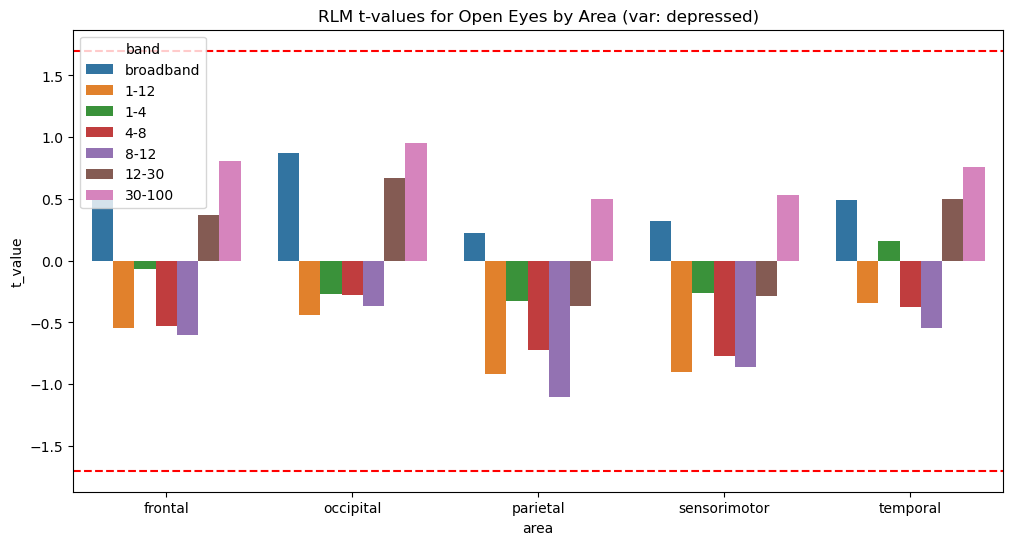

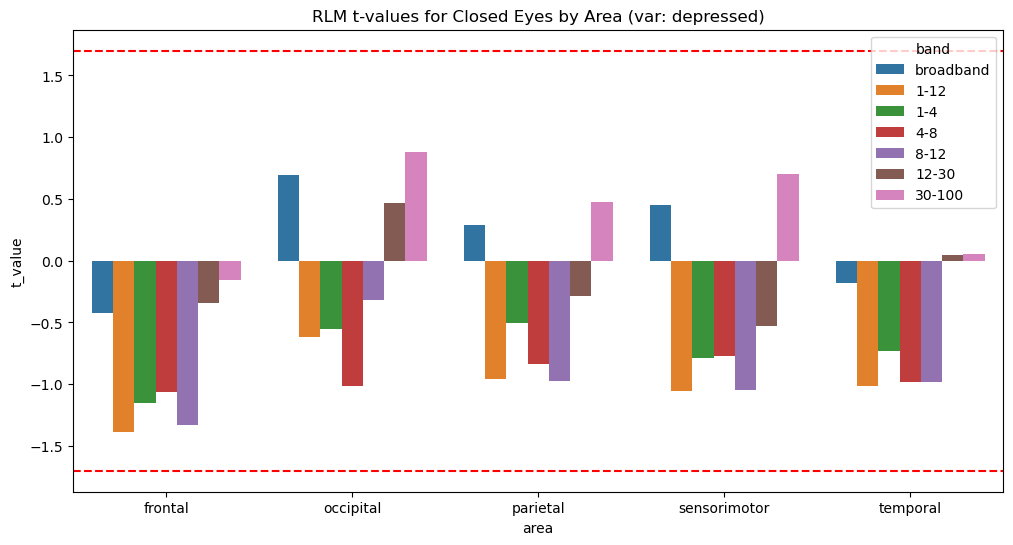

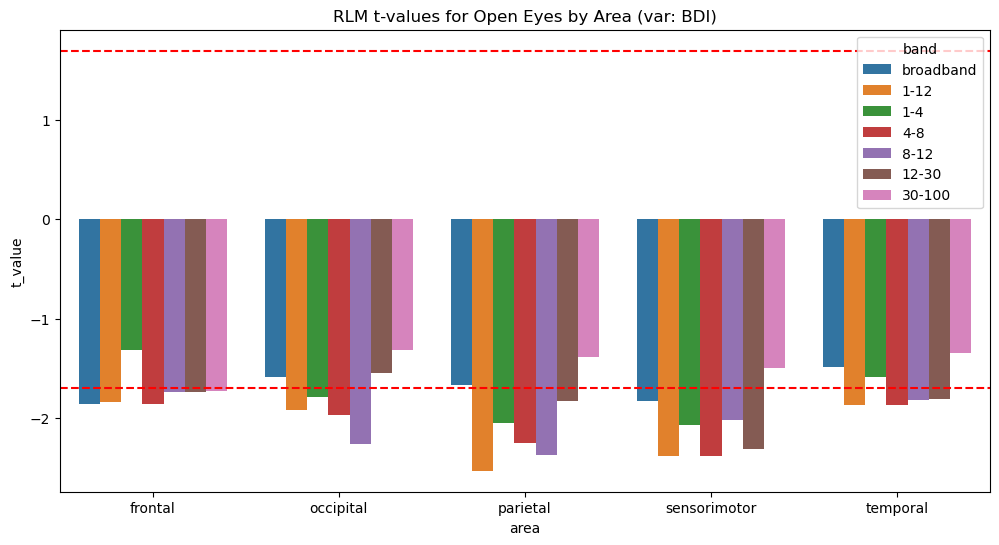

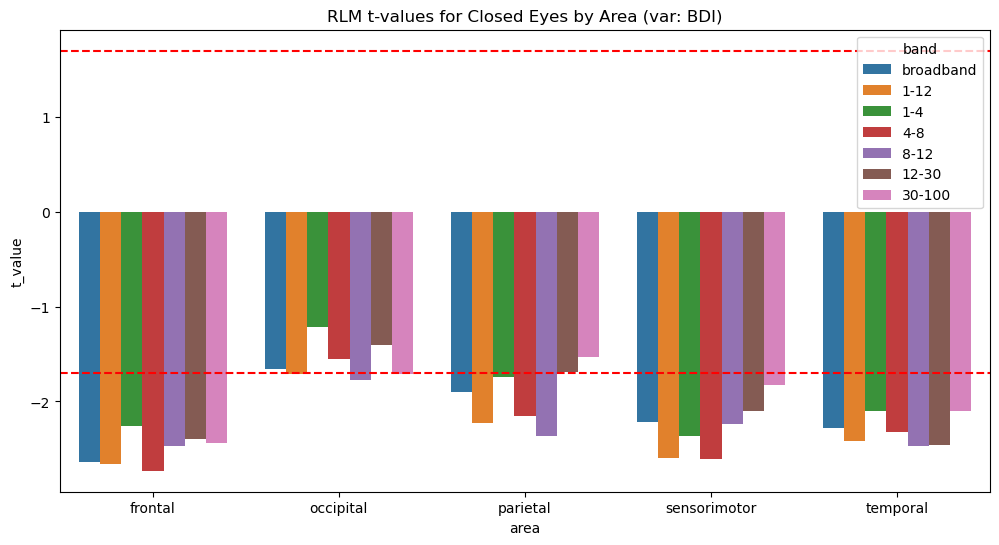

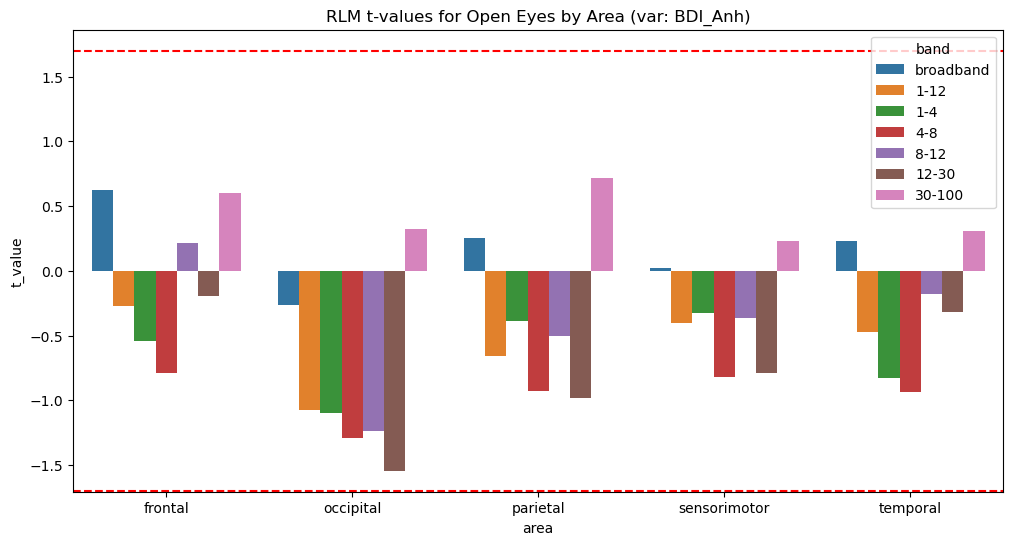

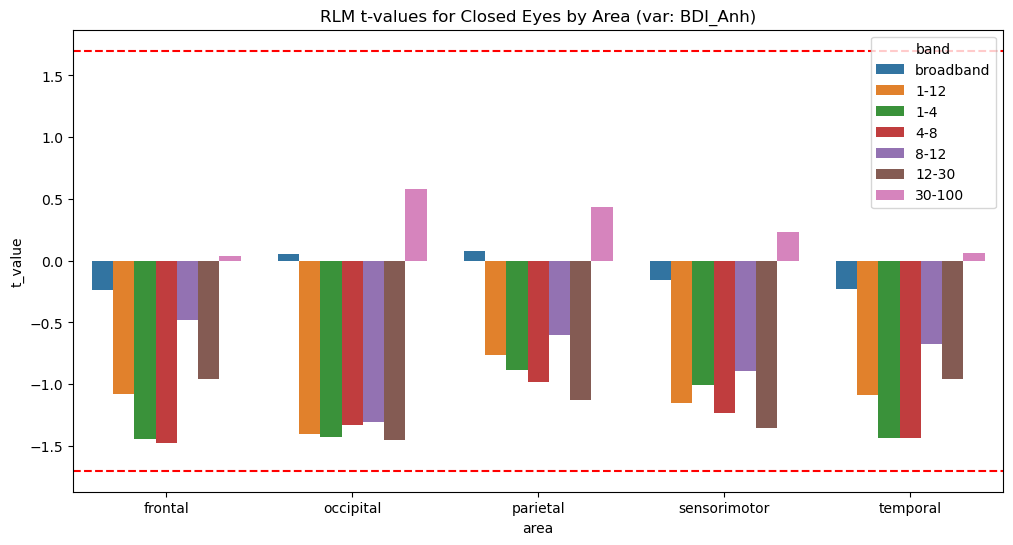

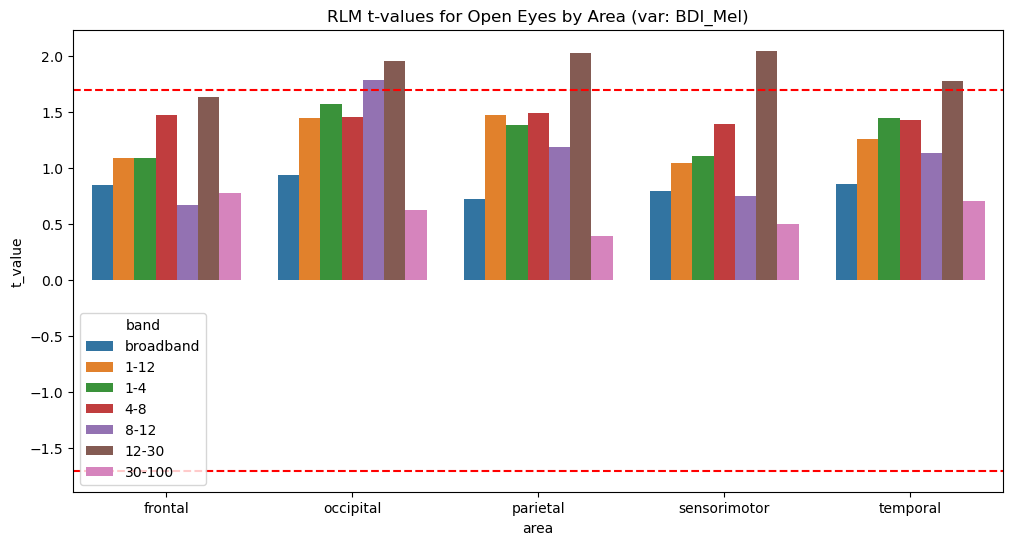

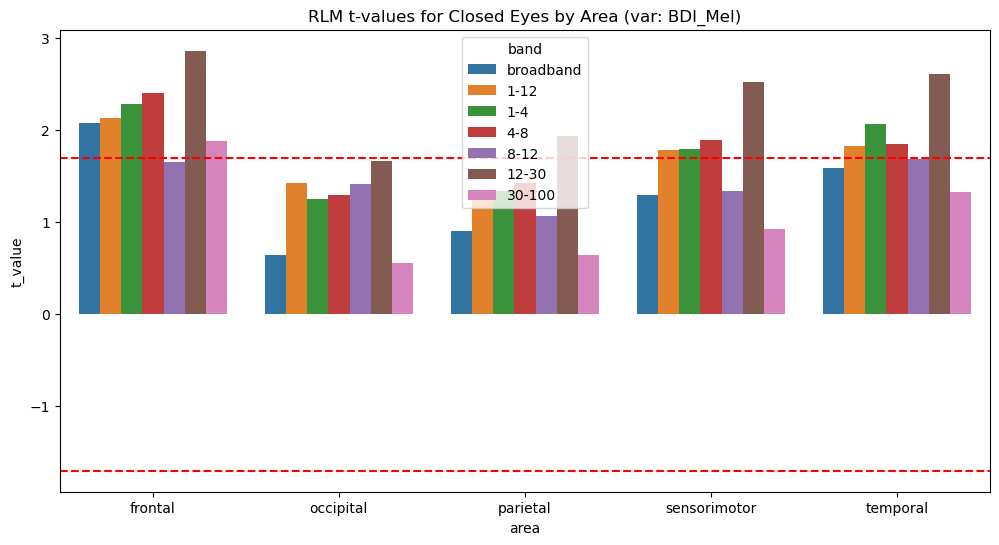

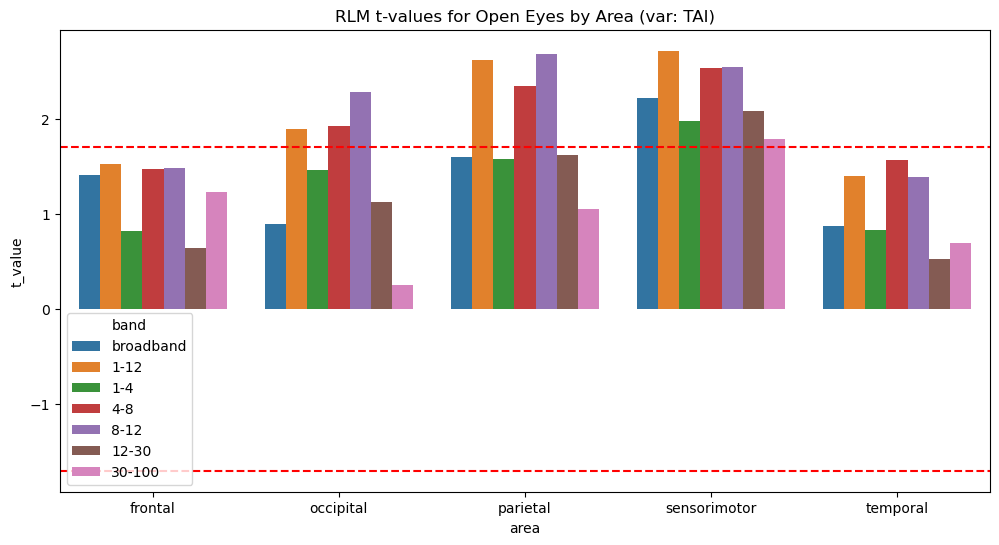

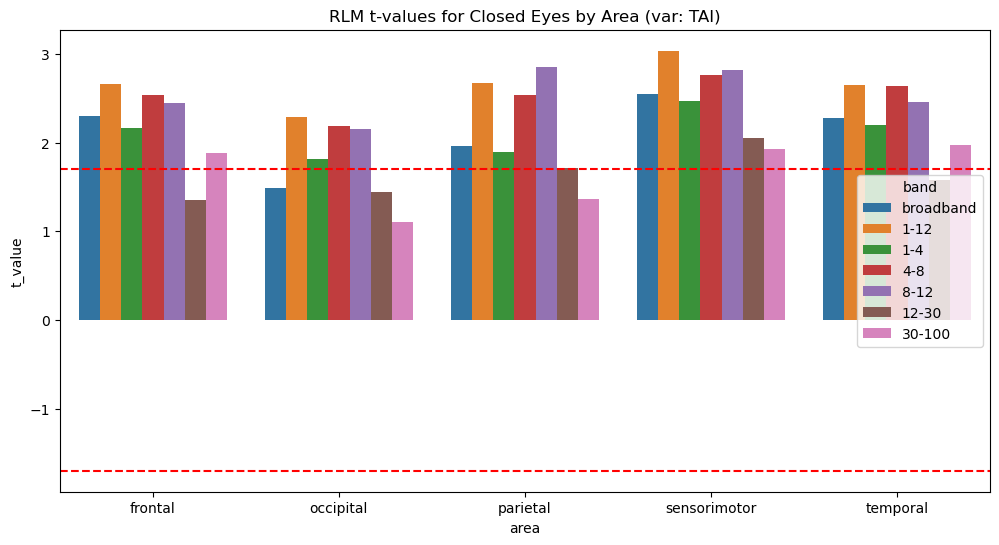

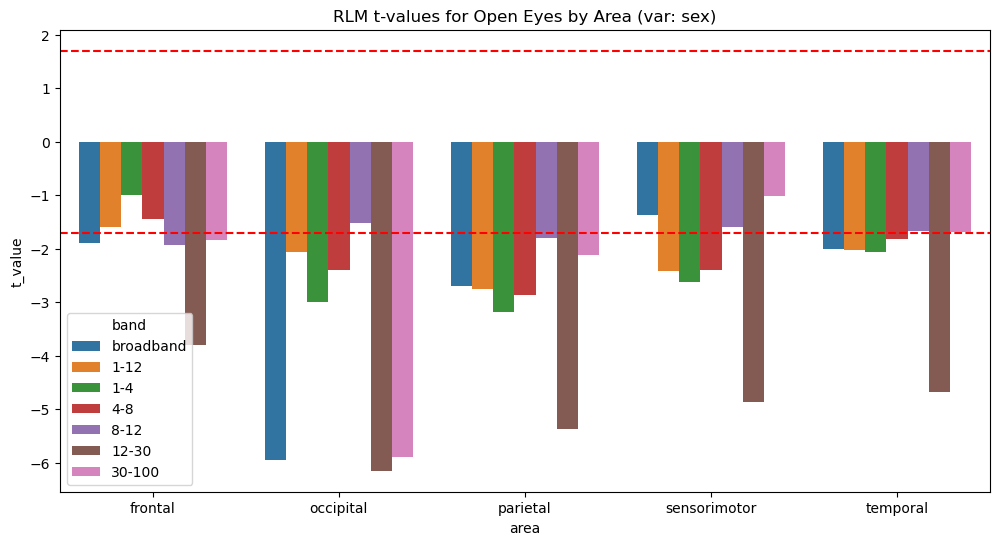

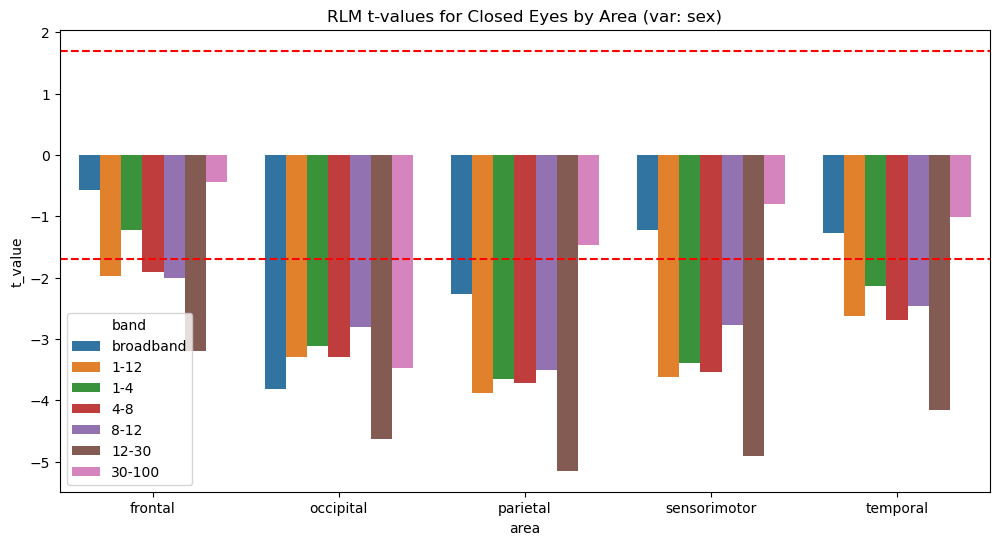

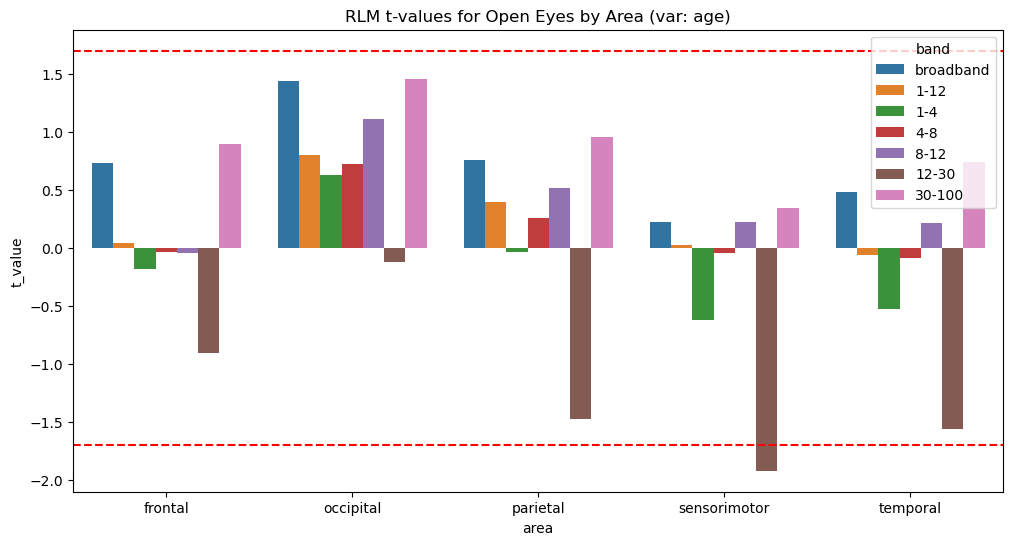

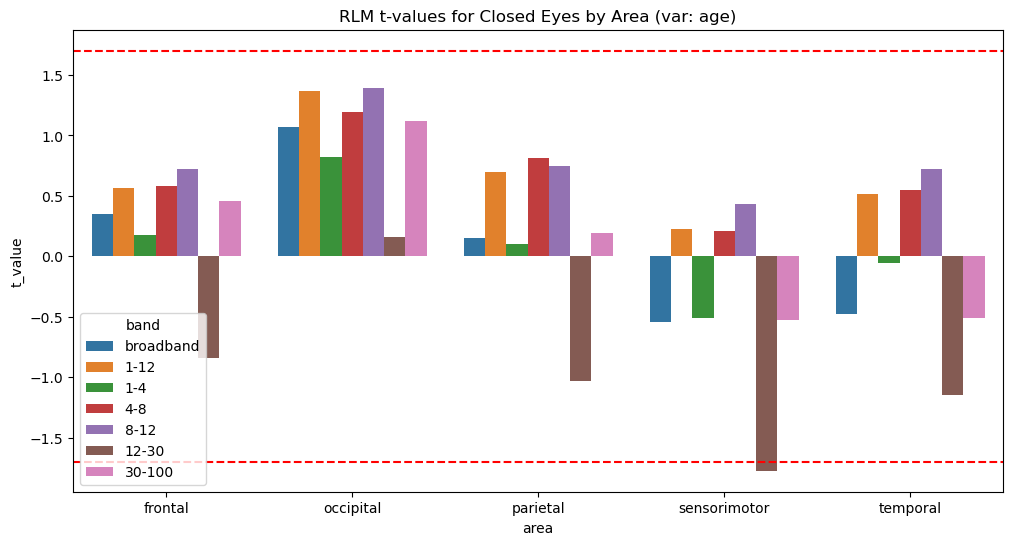

In [7]:
target_var = 'BDI_Anh'

def barplot_significance(eyes, var):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=rlm_results[(rlm_results['eyes'] == eyes) & (rlm_results['variable'] == var) & (rlm_results['area'].isin(region_map.keys()))],
                x='area', y='t_value', hue='band', errorbar=None)
    plt.title(f'RLM t-values for {str.capitalize(eyes)} Eyes by Area (var: {var})')
    plt.axhline(y=1.7, color='r', linestyle='--')
    plt.axhline(y=-1.7, color='r', linestyle='--')
    plt.show()

# barplot_significance('open', target_var)
# barplot_significance('closed', target_var)

for var in variables:
    if var in ['intercept', 'age_squared']:
        continue
    barplot_significance('open', var)
    barplot_significance('closed', var)

C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\1181300551.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


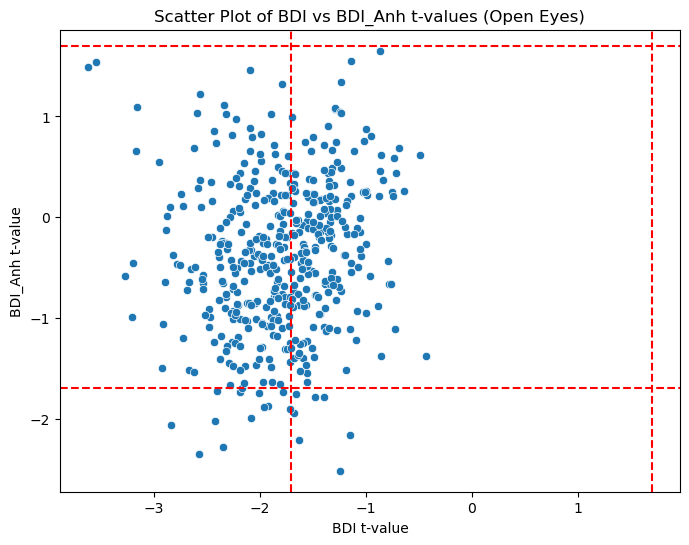

C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\1181300551.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


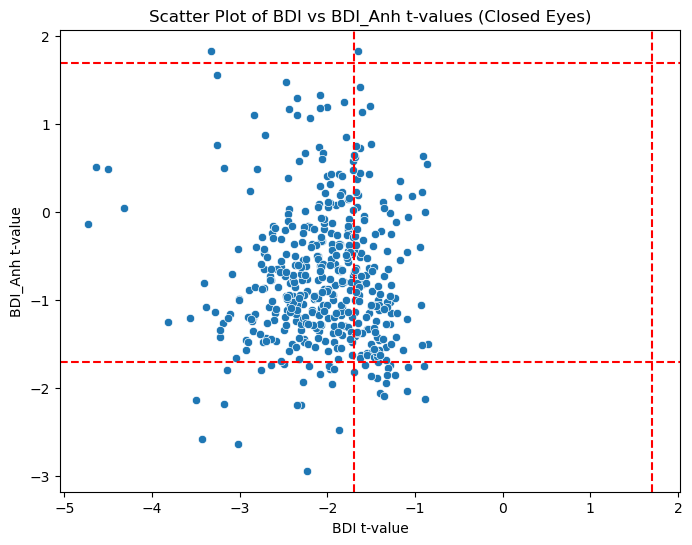

In [8]:
# Generate a scatter plot for t_values of two variables

def scatter_plot_t_values(eyes, var1, var2):
    plt.figure(figsize=(8, 6))
    subset = (
        rlm_results[(rlm_results['eyes'] == eyes) & (rlm_results['variable'].isin([var1, var2]))]
        .pivot_table(index=['area', 'band'], columns='variable', values='t_value')
        .reset_index()
    )
    sns.scatterplot(data=subset, x=var1, y=var2)
    plt.title(f'Scatter Plot of {var1} vs {var2} t-values ({str.capitalize(eyes)} Eyes)')
    plt.xlabel(f'{var1} t-value')
    plt.ylabel(f'{var2} t-value')
    plt.axhline(y=1.7, color='r', linestyle='--')
    plt.axhline(y=-1.7, color='r', linestyle='--')
    plt.axvline(x=1.7, color='r', linestyle='--')
    plt.axvline(x=-1.7, color='r', linestyle='--')
    plt.legend().remove()
    plt.show()

var1 = 'BDI'
var2 = 'BDI_Anh'

# iterate through all combinations of vars in variables

scatter_plot_t_values('open', var1, var2)
scatter_plot_t_values('closed', var1, var2)


In [9]:
significant_results = pd.DataFrame(columns=['variable', 'value', 'count', 'percentage'])

def count_significant_results(df, column):
    counts = df[column].value_counts()
    total = len(df)
    percentages = (counts / total) * 100
    percentages = percentages.round(2)
    return counts, percentages

for var in ['eyes', 'area', 'band']:
    counts, percentages = count_significant_results(rlm_results[rlm_results['p_significant']], var)

    counts_df = counts.to_frame(name='count')
    percentages_df = percentages.to_frame(name='percentage')
    merged_df = pd.merge(counts_df, percentages_df, left_index=True, right_index=True)

    print(merged_df, "\n")
    
    merged_df = merged_df.reset_index().rename(columns={var: 'value'})
    merged_df['variable'] = var
    significant_results = pd.concat([significant_results, merged_df], ignore_index=True)

print(significant_results)


        count  percentage
eyes                     
closed    949       59.91
open      635       40.09 

                            count  percentage
area                                         
src20_Supp_Motor_Area_R        51        3.22
src19_Supp_Motor_Area_L        51        3.22
src23_Frontal_Med_Orb_L        47        2.97
src22_Frontal_Sup_Medial_R     46        2.90
src21_Frontal_Sup_Medial_L     46        2.90
...                           ...         ...
src59_Temporal_Inf_L           11        0.69
src60_Temporal_Inf_R           10        0.63
src36_Occipital_Inf_R          10        0.63
src05_Frontal_Sup_Orb_L         8        0.51
src09_Frontal_Mid_Orb_L         6        0.38

[66 rows x 2 columns] 

           count  percentage
band                        
1-12         290       18.31
12-30        289       18.24
4-8          288       18.18
8-12         244       15.40
1-4          194       12.25
broadband    154        9.72
30-100       125        7.89 

   varia

C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\4015498119.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  significant_results = pd.concat([significant_results, merged_df], ignore_index=True)


C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\2211533162.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\2211533162.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\2211533162.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'closed'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')
C:\Users\lukad\AppData\Local\Temp\ipykernel_36208\2211533162.py:3: UserWarning: Boolean Series ke

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  1.,  2.,  3.,  8.,  4., 10.,  8.,
        11.,  7., 10., 15.,  7.,  6.,  8.,  2.,  4.,  0.,  0.,  2.,  1.,
         1.,  0.,  1.,  1.]),
 array([-3.35364316, -3.30807614, -3.26250912, -3.2169421 , -3.17137507,
        -3.12580805, -3.08024103, -3.03467401, -2.98910699, -2.94353996,
        -2.89797294, -2.85240592, -2.8068389 , -2.76127188, -2.71570485,
        -2.67013783, -2.62457081, -2.57900379, -2.53343677, -2.48786974,
        -2.44230272, -2.3967357 , -2.35116868, -2.30560166, -2.26003463,
        -2.21446761, -2.16890059, -2.12333357, -2.07776655, -2.03219952,
        -1.9866325 ]),
 <BarContainer object of 30 artists>)

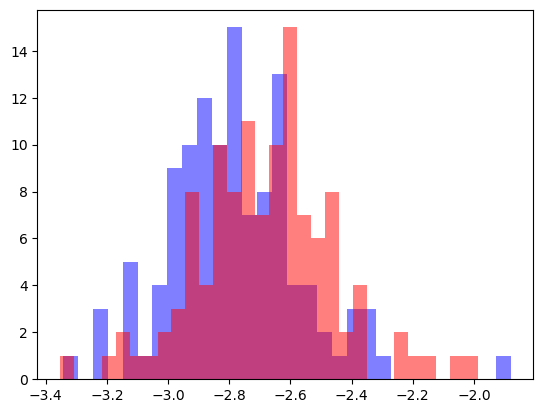

In [10]:
# Plot the distribution of CSER values with eyes set to 'open' and 'closed'
plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
plt.hist(df[df['eyes'] == 'closed'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')

# Plot the distribution of CSER values with eyes set to 'open' and 'closed'
# plt.hist(df[df['depressed'] == 0]['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
# plt.hist(df[df['depressed'] == 1]['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')